In [157]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import nltk
import gensim
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier

In [158]:
df=pd.read_csv('/Users/anderiyu/Desktop/USYD/2023s1/MKTG6010/tweets_sport.csv')
tv_data = pd.read_csv('/Users/anderiyu/Desktop/USYD/2023s1/MKTG6010/tv_ratings.csv')
tweets_data = pd.read_csv('/Users/anderiyu/Desktop/USYD/2023s1/MKTG6010/tweets_sport.csv', parse_dates=['time'])
group_tweet_data = tweets_data.groupby([pd.Grouper('event_number'),pd.Grouper('weekday'),pd.Grouper(key='time', freq='15min')]).agg(number_of_tweet=('text', 'count'),
                                                                              number_of_player=('player_dummy','sum'),
                                                                              number_of_team=('team_dummy','sum'))




group_tweet_data = group_tweet_data.reset_index()
import datetime as dt
group_tweet_data['start_time'] = group_tweet_data['time'] + dt.timedelta(minutes=15)
group_tweet_data.head()
group_tweet_data['time'] = group_tweet_data['time'].apply(lambda x: x.strftime('%H:%M'))
group_tweet_data['start_time'] = group_tweet_data['start_time'].apply(lambda x: x.strftime('%H:%M'))

In [159]:
df.head()

,id,text,event_number,player_dummy,team_dummy,weekday,month,day,time,user_screen_name,retweets,likes,comments
0,5.210000e+17,"""rt @dariofranchitti: this bathurst race has b...",11,0,0,7,10,12,7:28,007_dot,0.0,0.0,0.0
1,5.210000e+17,"""rt @wtf1couk: gp3 fans while you're waiting f...",11,0,0,7,10,12,7:28,007_dot,0.0,0.0,0.0
2,5.210000e+17,"""rt @sally_fitz: incredible final laps of #bat...",11,1,0,7,10,12,7:31,007cnt,0.0,0.0,0.0
3,5.210000e+17,"""rt @v8supercars: top 10 - mostert, moffat, pe...",11,0,0,7,10,12,9:04,007pixxx,0.0,0.0,0.0
4,5.210000e+17,"""#bathurst1000 i present to you, the fully st...",11,0,0,7,10,12,10:20,007pixxx,0.0,0.0,0.0


In [160]:
merged_data = pd.merge(tv_data, group_tweet_data, how='left',
                       left_on=['start_time','event_number','weekday'],
                       right_on=['start_time','event_number','weekday'])

merged_data = merged_data.dropna()

In [161]:
merged_data.shape

(2558, 11)

In [163]:
from nltk.tokenize import TweetTokenizer

tweet_texts = df['text'].values
tokenizer = TweetTokenizer()
tokenized = [tokenizer.tokenize(text) for text in tweet_texts]
# print(tokenized)

In [173]:
from sklearn.feature_extraction import text 
my_additional_stop_words = ["bathurst","adelaide","http","tas","tcm","darwin","coateshire","sandown","clipsal","sydney", "townsville"]
stop_words = text.ENGLISH_STOP_WORDS.union(my_additional_stop_words)

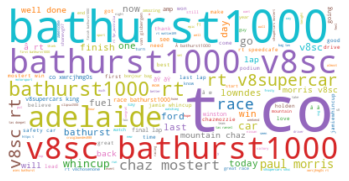

In [175]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

#aggerate all the tweets into one file and generate the word cloud
text_tweets = df['text']
all_tweets = ''.join(text_tweets.tolist())

fig, ax = plt.subplots()
wordcloud = WordCloud(background_color="white", colormap='tab10', max_words=200).generate(all_tweets)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [210]:
from nltk.stem.porter import PorterStemmer
tokens = [PorterStemmer().stem(word) for word in tokenized_no_stopwords]
# print(tokens)


In [211]:
from sklearn.feature_extraction.text import CountVectorizer

#text_train = list(train['tokens'].apply(lambda x: ' '.join(x)))
#text_test = list(test['tokens'].apply(lambda x: ' '.join(x)))
#vectoriser = CountVectorizer(min_df = 5, tokenizer = lambda s: s.split(' '))
vectoriser = CountVectorizer()

BoW = vectoriser.fit_transform(tokens)


In [212]:
from nltk.corpus import treebank_chunk
from nltk.chunk import ne_chunk
  
ne_tree=ne_chunk(treebank_chunk.tagged_sents()[0])
treebank_chunk.tagged_sents()


[[('Pierre', 'NNP'), ('Vinken', 'NNP'), (',', ','), ('61', 'CD'), ('years', 'NNS'), ('old', 'JJ'), (',', ','), ('will', 'MD'), ('join', 'VB'), ('the', 'DT'), ('board', 'NN'), ('as', 'IN'), ('a', 'DT'), ('nonexecutive', 'JJ'), ('director', 'NN'), ('Nov.', 'NNP'), ('29', 'CD'), ('.', '.')], [('Mr.', 'NNP'), ('Vinken', 'NNP'), ('is', 'VBZ'), ('chairman', 'NN'), ('of', 'IN'), ('Elsevier', 'NNP'), ('N.V.', 'NNP'), (',', ','), ('the', 'DT'), ('Dutch', 'NNP'), ('publishing', 'VBG'), ('group', 'NN'), ('.', '.')], ...]

In [213]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentiment = SentimentIntensityAnalyzer()
text_tweets = df['text'].to_string(index=False)  
sentiment_scores=sentiment.polarity_scores(text_tweets)

In [214]:
sentiment_scores

{'neg': 0.063, 'neu': 0.768, 'pos': 0.169, 'compound': 1.0}

In [215]:
df = df.loc[:, ~df.columns.duplicated()]


In [216]:
df.isnull().sum()

id                  0
text                0
event_number        0
player_dummy        0
team_dummy          0
weekday             0
month               0
day                 0
time                0
user_screen_name    0
retweets            0
likes               0
comments            0
tokens              0
dtype: int64

In [217]:
df = df.dropna()
df['retweets'] = df['retweets'].fillna(df['retweets'].mean())
df['likes'] = df['likes'].fillna(df['likes'].mean())
df['comments'] = df['comments'].fillna(df['comments'].mean())

In [218]:
len(tokens)

212478

In [249]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# Initialize the SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

# List to store sentiment scores for each token
scores = []

# Iterate over each tweet
for tweet in tokens:
    # Calculate sentiment score for the tweet
    sentiment_score = sid.polarity_scores(tweet)
    score = sentiment_score["compound"]
    scores.append(score)

# Show the sentiment score of index 1
max(scores)

    

0.6369

In [252]:
len(scores)

212478

In [251]:
count_zeros = scores.count(0)
count_zeros

202442

In [253]:
212478-202442

10036

In [265]:
threshold = 0.05 


sentiment_categories = []
for score in sentiment_scores:
    try:
        score_float = float(score)  
        if score_float > threshold:
            sentiment_categories.append('positive')
        elif score_float < -threshold:
            sentiment_categories.append('negative')
        else:
            sentiment_categories.append('neutral')
    except ValueError:
        sentiment_categories.append('non-numeric')  



In [269]:
positive_tweets = []

for tweet in tokens:
    sentiment_scores = sid.polarity_scores(tweet)
    if sentiment_scores['compound'] > 0:
        positive_tweets.append(tweet)

In [292]:
import nltk
import string

positive_tokens = []
for tweet in positive_tweets:
    tokens = nltk.word_tokenize(tweet)
    positive_tokens.extend(tokens)
stopwords = nltk.corpus.stopwords.words('english')
punctuation = string.punctuation

filtered_tokens = [token for token in positive_tokens if token.lower() not in stopwords and token not in punctuation]

word_freq = nltk.FreqDist(filtered_tokens)
top_pos_words = word_freq.most_common(20)
for word, frequency in top_pos_words:
    print(word, frequency)


win 924
great 521
well 361
like 333
best 311
wow 283
top 262
good 258
love 220
thank 166
winner 136
hope 125
want 110
better 109
fan 101
luck 98
enjoy 94
brilliant 92
huge 89
free 82


In [288]:
import nltk
import string

# Tokenize the negative tweets
negative_tokens = []
for tweet in negative_tweets:
    tokens = nltk.word_tokenize(tweet)
    negative_tokens.extend(tokens)

# Remove stopwords and punctuation
stopwords = nltk.corpus.stopwords.words('english')
punctuation = string.punctuation

filtered_tokens = [token for token in negative_tokens if token.lower() not in stopwords and token not in punctuation]

# Count the occurrences of each word
word_freq = nltk.FreqDist(filtered_tokens)

# Find the top 20 unique words
top_neg_words = word_freq.most_common(20)

# Display the top 20 unique words
for word, frequency in top_neg_words:
    print(word, frequency)


fuck 177
stall 110
lost 96
bad 95
miss 93
hard 90
crash 85
stop 80
pu 64
shit 59
heartbreak 53
hell 50
shame 48
suck 44
fight 44
cut 43
poor 41
fire 40
pay 38
bastard 38


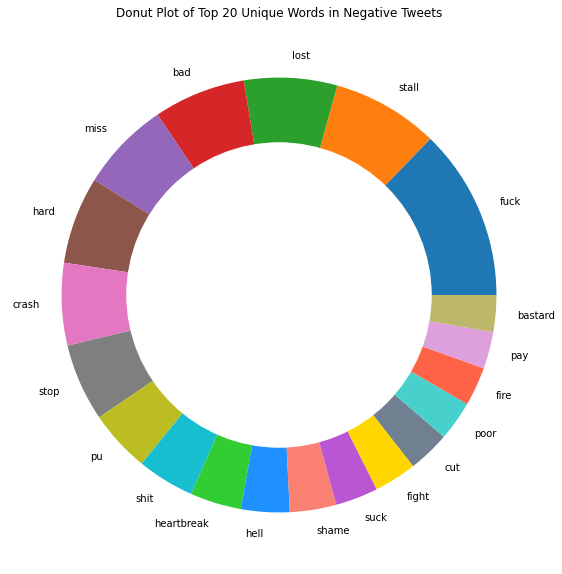

In [291]:
import matplotlib.pyplot as plt

# Define the colors for the pie chart
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple',
          'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan',
          'limegreen', 'dodgerblue', 'salmon', 'mediumorchid', 'gold',
          'slategray', 'mediumturquoise', 'tomato', 'plum', 'darkkhaki']

plt.figure(figsize=(16, 10))
my_circle = plt.Circle((0, 0), 0.7, color='white')

word_labels = [word for word, _ in top_neg_words]
word_counts_neg = [count for _, count in top_neg_words]

plt.pie(word_counts_neg, labels=word_labels, colors=colors)
p = plt.gcf()
p.gca().add_artist(my_circle)

plt.title('Donut Plot of Top 20 Unique Words in Negative Tweets')
plt.show()


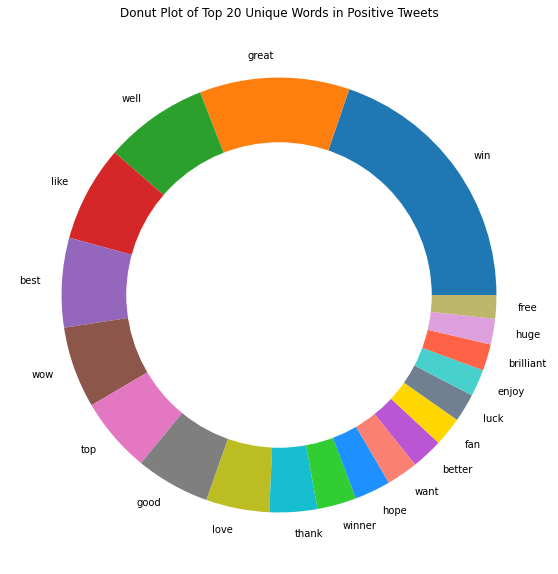

In [285]:
import matplotlib.pyplot as plt

# Define the colors for the pie chart
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple',
          'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan',
          'limegreen', 'dodgerblue', 'salmon', 'mediumorchid', 'gold',
          'slategray', 'mediumturquoise', 'tomato', 'plum', 'darkkhaki']

plt.figure(figsize=(16, 10))
my_circle = plt.Circle((0, 0), 0.7, color='white')

word_labels = [word for word, _ in top_pos_words]
word_counts = [count for _, count in top_pos_words]

plt.pie(word_counts, labels=word_labels, colors=colors)
p = plt.gcf()
p.gca().add_artist(my_circle)

plt.title('Donut Plot of Top 20 Unique Words in Positive Tweets')
plt.show()



In [275]:
positive_tweets[10]

'win'

In [341]:
df['sentiment'] = scores
df['sentiment'].min()

-0.6908

In [342]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 212478 entries, 0 to 212477
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                13522 non-null   float64
 1   text              13522 non-null   object 
 2   event_number      13522 non-null   float64
 3   player_dummy      13522 non-null   float64
 4   team_dummy        13522 non-null   float64
 5   weekday           13522 non-null   float64
 6   month             13522 non-null   float64
 7   day               13522 non-null   float64
 8   time              13522 non-null   object 
 9   user_screen_name  13522 non-null   object 
 10  retweets          13522 non-null   float64
 11  likes             13522 non-null   float64
 12  comments          13522 non-null   float64
 13  sentiment         212478 non-null  float64
dtypes: float64(11), object(3)
memory usage: 24.3+ MB


In [349]:

negative_sentiments = df[df['sentiment'] <0]

# Group the filtered data by weekday and count the frequency of negative sentiment scores
weekday_counts = negative_sentiments['weekday'].value_counts().sort_index()



5.0      6
6.0     27
7.0    180
Name: weekday, dtype: int64

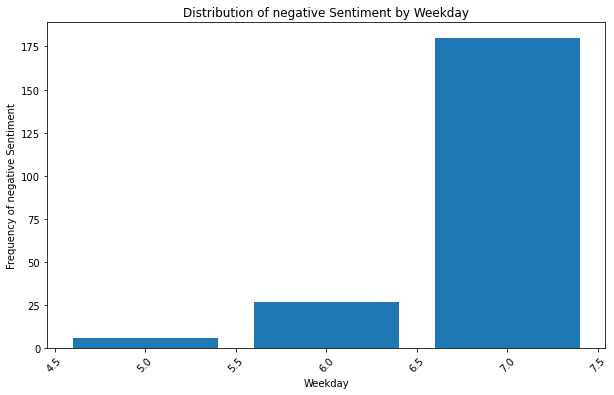

In [352]:

# Group the filtered data by weekday and count the frequency
weekday_counts = negative_sentiments['weekday'].value_counts().sort_index()

# Plot the distribution
plt.figure(figsize=(10, 6))
plt.bar(weekday_counts.index, weekday_counts.values)
plt.xlabel('Weekday')
plt.ylabel('Frequency of negative Sentiment')
plt.title('Distribution of negative Sentiment by Weekday')
plt.xticks(rotation=45)
plt.show()

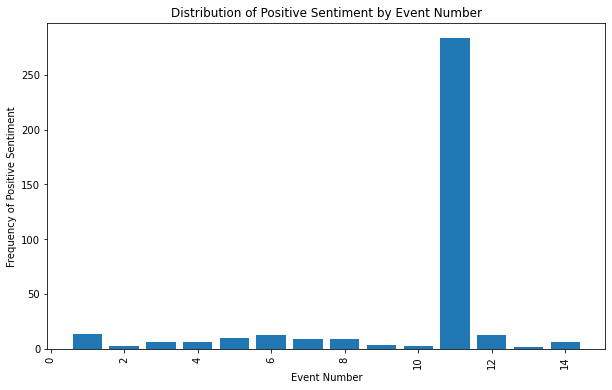

In [354]:
# Assuming you have a DataFrame named 'positive_df' with columns 'event_number' and 'sentiment'

# Calculate the event counts in ascending order
event_counts = positive_df['event_number'].value_counts().sort_index(ascending=True)

# Plot the distribution
plt.figure(figsize=(10, 6))
plt.bar(event_counts.index, event_counts.values)
plt.xlabel('Event Number')
plt.ylabel('Frequency of Positive Sentiment')
plt.title('Distribution of Positive Sentiment by Event Number')
plt.xticks(rotation=90)
plt.show()



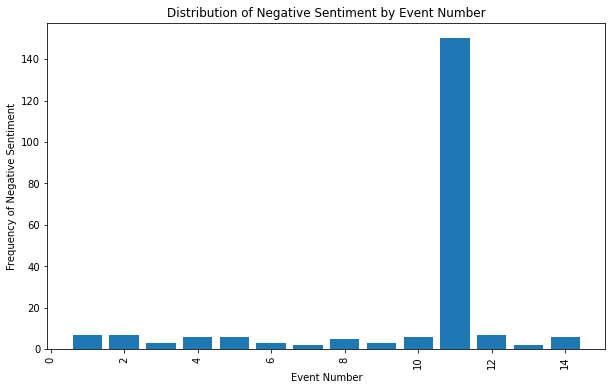

In [358]:
# Assuming you have a DataFrame named 'negative_df' with columns 'event_number' and 'sentiment'

# Calculate the event counts in ascending order
event_counts = negative_sentiments['event_number'].value_counts().sort_index(ascending=True)

# Plot the distribution
plt.figure(figsize=(10, 6))
plt.bar(event_counts.index, event_counts.values)
plt.xlabel('Event Number')
plt.ylabel('Frequency of Negative Sentiment')
plt.title('Distribution of Negative Sentiment by Event Number')
plt.xticks(rotation=90)
plt.show()


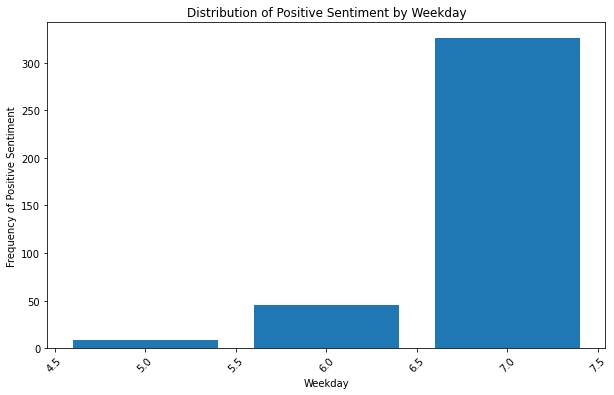

In [351]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' with columns 'weekday' and 'sentiment'

# Filter the DataFrame for positive sentiment
positive_df = df[df['sentiment'] >0]

# Group the filtered data by weekday and count the frequency
weekday_counts = positive_df['weekday'].value_counts().sort_index()

# Plot the distribution
plt.figure(figsize=(10, 6))
plt.bar(weekday_counts.index, weekday_counts.values)
plt.xlabel('Weekday')
plt.ylabel('Frequency of Positive Sentiment')
plt.title('Distribution of Positive Sentiment by Weekday')
plt.xticks(rotation=45)
plt.show()


In [272]:
negative_tweets = []

for tweet in tokens:
    sentiment_scores = sid.polarity_scores(tweet)
    if sentiment_scores['compound'] < 0:
        negative_tweets.append(tweet)

In [276]:
negative_tweets[10]

'delay'

In [273]:
neutral_tweets = []

for tweet in tokens:
    sentiment_scores = sid.polarity_scores(tweet)
    if sentiment_scores['compound'] == 0:
        neutral_tweets.append(tweet)

In [277]:
neutral_tweets[10]

'aussi'

In [271]:
# positive_tweets

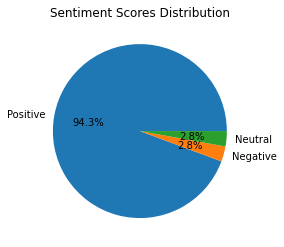

In [266]:
import matplotlib.pyplot as plt

sentiment_categories = ['positive', 'negative', 'neutral']
counts = [sentiment_categories.count('positive'), sentiment_categories.count('negative'), sentiment_categories.count('neutral')]

# Calculate percentage of positive sentiment scores
total = sum(counts)
positive_percentage = (counts[0] / total) * 100

# Create a pie chart
labels = ['Positive', 'Negative', 'Neutral']
sizes = [positive_percentage, counts[1], counts[2]]
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Sentiment Scores Distribution')
plt.show()


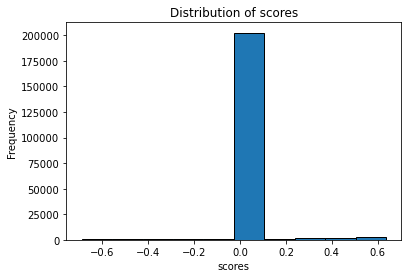

In [250]:
import matplotlib.pyplot as plt



plt.hist(scores, bins=10, edgecolor='black')
plt.xlabel('scores')
plt.ylabel('Frequency')
plt.title('Distribution of scores')
plt.show()


In [369]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import random
sub_size=3194
sub=random.sample(scores, sub_size)
X=sub
X1_arr=np.array(X).reshape(-1,1)
# Assuming you have X as the feature matrix and y as the target variable
y=tv_data["tvviewers"]
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X1_arr, y, test_size=0.2, random_state=42)

# Create and fit the SVR model
svr = SVR(kernel='rbf', C=1.0, epsilon=0.1)
svr.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svr.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error:", mse)
print("R-squared:", r2)
# 3194

Mean Squared Error: 5550.870746265841
R-squared: -0.09134562139373736


In [371]:
model_1 = sm.OLS(y , X1_arr).fit()
model_1.summary()
# Y is tv views, x is sentimetns socres

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              tvviewers   R-squared (uncentered):                   0.003
Model:                            OLS   Adj. R-squared (uncentered):              0.003
Method:                 Least Squares   F-statistic:                              9.426
Date:                Sat, 13 May 2023   Prob (F-statistic):                     0.00216
Time:                        02:15:56   Log-Likelihood:                         -19237.
No. Observations:                3194   AIC:                                  3.848e+04
Df Residuals:                    3193   BIC:                                  3.848e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            60.8911     19.833      3.070      0.002      22.004      99.778
==============================================================================
Omnibus:                     2396.656   Durbin-Watson:                   0.770
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            46427.224
Skew:                           3.447   Prob(JB):                         0.00
Kurtosis:                      20.359   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [376]:
sub_size=(2558)
sub_2=random.sample(scores, sub_size)
X=sub_2
X2_arr=np.array(X).reshape(-1,1)
x_5=merged_data["number_of_tweet"]
x_6=merged_data["number_of_player"]
exog_5 = pd.concat([x_5,x_6], axis=1)
model_2 = sm.OLS(X2_arr , exog_5).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.013
Model:                            OLS   Adj. R-squared (uncentered):              0.013
Method:                 Least Squares   F-statistic:                              17.47
Date:                Sat, 13 May 2023   Prob (F-statistic):                    2.91e-08
Time:                        02:21:41   Log-Likelihood:                          2471.6
No. Observations:                2558   AIC:                                     -4939.
Df Residuals:                    2556   BIC:                                     -4927.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
number_of_tweet      0.0012      0.000      5.339      0.000       0.001       0.002
number_of_player    -0.0019      0.002     -1.008      0.314      -0.006       0.002
==============================================================================
Omnibus:                     2028.219   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            86661.784
Skew:                           3.391   Prob(JB):                         0.00
Kurtosis:                      30.696   Cond. No.                         10.3
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [374]:
x_5.shape

(2558,)

In [375]:
X1_arr.shape

(3194, 1)

In [360]:
tv_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3194 entries, 0 to 3193
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   tv_channel    3194 non-null   object
 1   city          3194 non-null   object
 2   tvviewers     3194 non-null   int64 
 3   start_time    3194 non-null   object
 4   end_time      3194 non-null   object
 5   event_number  3194 non-null   int64 
 6   weekday       3194 non-null   int64 
dtypes: int64(3), object(4)
memory usage: 174.8+ KB


In [145]:
import plotly.graph_objects as go

# Define data
text = ['Negative', 'Neutral', 'Positive']
values = [6.3, 76.8, 16.9]
title = {'position': 'top center', 'text': 'Funnel-Chart of Sentiment Distribution'}

# Create funnel chart
fig = go.Figure(go.Funnelarea(
    text=text,
    values=values,
    title=title,
))

# Show the chart
fig.show()


